In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic

In [14]:
filepath_time_series_data = 'data/ods047_20230325_2cols_renamedcol.csv'

df = pd.read_csv(filepath_time_series_data)  #, header=None, names=['time', 'value'])

price_column_name = "price"


ev_comfort_charge_capacity_kwh = int(0.8 * 60)  # 80% of 60kWh
ev_max_charge_capacity_kwh = 60  # 60kWh
buffer = 1  # 50%


# hardcoded for now
ev_pmax = 22  # kW
ev_charged_per_quarter = ev_pmax / 4  # kWh


ev_charging_quarters_count_comfort = ev_comfort_charge_capacity_kwh / ev_charged_per_quarter
ev_charging_quarters_count_max = ev_max_charge_capacity_kwh / ev_charged_per_quarter

total_quarters_count = len(df)

percent_of_quarters_needed_comfort = ev_charging_quarters_count_comfort / total_quarters_count
percent_of_quarters_needed_max = ev_charging_quarters_count_max / total_quarters_count
ic(percent_of_quarters_needed_comfort, percent_of_quarters_needed_max)

percent_of_quarters_needed_comfort = percent_of_quarters_needed_comfort * (1 + buffer)
percent_of_quarters_needed_max = percent_of_quarters_needed_max * (1 + buffer)
ic(percent_of_quarters_needed_comfort, percent_of_quarters_needed_max)

df['is_in_lowest_quarters_comfort'] = df[price_column_name] <= df[price_column_name].quantile(percent_of_quarters_needed_comfort)

df['is_in_lowest_quarters_max'] = df[price_column_name] <= df[price_column_name].quantile(percent_of_quarters_needed_max)


ic| percent_of_quarters_needed_comfort: 0.0909090909090909
    percent_of_quarters_needed_max: 0.11363636363636363
ic| percent_of_quarters_needed_comfort: 0.1818181818181818
    percent_of_quarters_needed_max: 0.22727272727272727


In [15]:
highest_price_in_lowest_quarters_comfort = df[df['is_in_lowest_quarters_comfort']][price_column_name].max()

highest_price_in_lowest_quarters_max = df[df['is_in_lowest_quarters_max']][price_column_name].max()

In [16]:
highest_price_in_lowest_quarters_comfort, highest_price_in_lowest_quarters_max

(-241.09, -156.37)

In [10]:
df[df['is_in_lowest_quarters_comfort']][price_column_name]

12   -358.04
27   -377.50
37   -560.62
38   -535.97
39   -430.33
40   -435.29
45   -427.28
47   -528.36
48   -428.31
49   -474.04
50   -485.94
53   -392.05
87   -394.59
Name: price, dtype: float64

In [19]:
df[df['is_in_lowest_quarters_max']][price_column_name]

37   -560.62
38   -535.97
39   -430.33
40   -435.29
45   -427.28
47   -528.36
48   -428.31
49   -474.04
50   -485.94
53   -392.05
87   -394.59
Name: Negative imbalance price, dtype: float64

In [11]:
# print the whole df without truncation
pd.set_option('display.max_rows', None)
print(df)

                     DateTime  Negative imbalance price  is_in_lowest_quarters
0   2024-03-25T23:45:00+01:00                    239.52                  False
1   2024-03-25T23:30:00+01:00                    218.06                  False
2   2024-03-25T23:15:00+01:00                    139.89                  False
3   2024-03-25T23:00:00+01:00                    181.01                  False
4   2024-03-25T22:45:00+01:00                    141.38                  False
5   2024-03-25T22:30:00+01:00                    136.19                  False
6   2024-03-25T22:15:00+01:00                    139.91                  False
7   2024-03-25T22:00:00+01:00                    139.09                  False
8   2024-03-25T21:45:00+01:00                   -276.10                  False
9   2024-03-25T21:30:00+01:00                    135.00                  False
10  2024-03-25T21:15:00+01:00                    207.16                  False
11  2024-03-25T21:00:00+01:00                    139

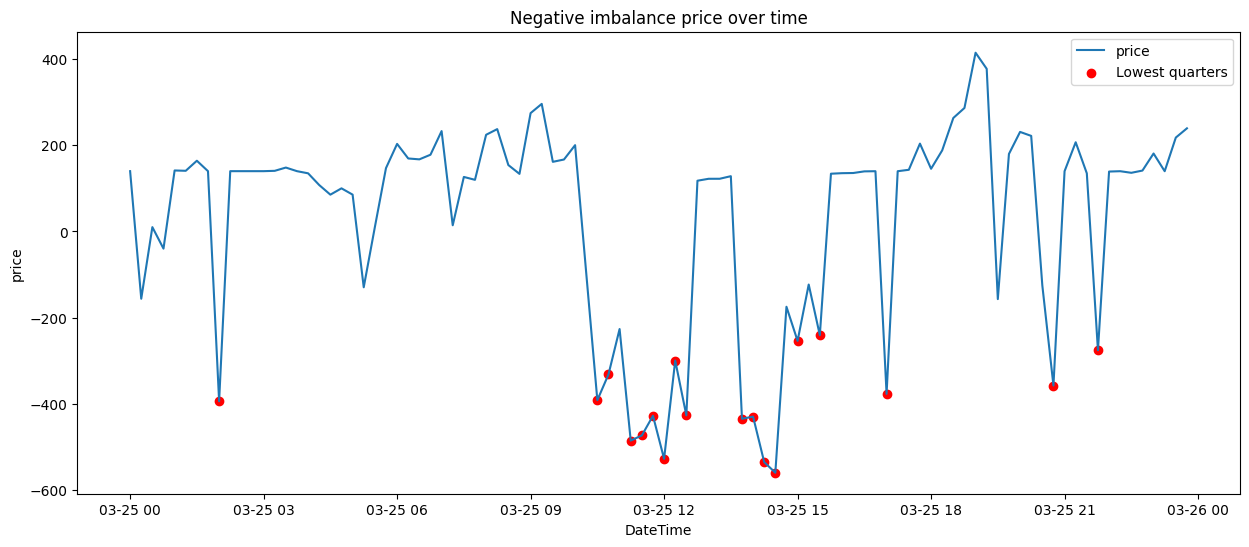

In [18]:
# Assume your dataframe is df
df['DateTime'] = pd.to_datetime(df['DateTime'])  # Ensure DateTime is in the correct format

plt.figure(figsize=(15,6))

# plot all the prices
plt.plot(df['DateTime'], df[price_column_name], label=price_column_name)

# overlay the points where 'is_in_lowest_quarters' is True
plt.scatter(df[df['is_in_lowest_quarters_comfort']]['DateTime'], df[df['is_in_lowest_quarters_comfort']][price_column_name], color='red', label='Lowest quarters')

plt.xlabel('DateTime')
plt.ylabel(price_column_name)
plt.title('Negative imbalance price over time')
plt.legend()

plt.show()